## Keras를 활용한 모델 개발 복습

### 선형회귀(linear regression)

- 어떠한 독립 변수들과 종속 변수 간의 관계를 예측할때, 그 사이 관계를 선형 관계(1차 함수)로 가정하고, 모델링하는 지도 학습 알고리즘
- 보통, 원인(X)와 결과(Y) 간의 대략적인 관계 해석이나, 예측에 활용
  
- 변수의 수에 따라, 다음과 같이 구분

- 변수 1개와 종속 변수 간의 선형 관계 모델링은 단순 선형 회귀 분석
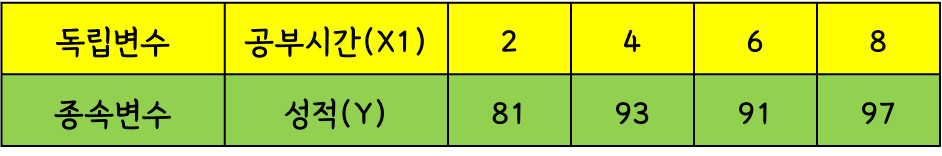
- 독립 변수 여러 개와 종속 변수 간의 선형 관계 모델링은 다중 선형 회귀 분석
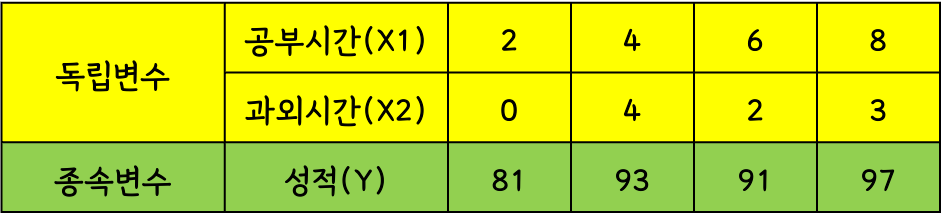

### Keras란?
- Keras는 신경망 모델의 생성 및 학습을 위한 간소화된 인터페이스를 제공하는 오픈 소스 Python 라이브러리  
- 신경망을 생성하고 작업하기 위한 강력한 라이브러리인 TensorFlow에 대한 상위 수준 API역할
- Keras는 TensorFlow 의 복잡성을 단순화하여 개발자가 ML 모델을 쉽게 개발할 수 있도록 함

In [ ]:
import numpy as np
import keras

# 1. 데이터를 준비한다.

# 2. 모델의 구조를 설계한다.

# 3. 모델의 학습을 설정한다.

# 4. 모델을 학습시킨다.


## 보스턴(BOSTON)의 집값을 예측하는 모델 개발
데이터 URL : https://raw.githubusercontent.com/ygcho-git/basic_AI/main/dataset/boston.csv

- CRIM: 지역별 범죄 발생률
- ZN: 25,000평방피트를 초과하는 거주 지역의 비율
- NDUS: 비상업 지역 넓이 비율
- CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX: 일산화질소 농도
- RM: 거주할 수 있는 방 개수
- AGE: 1940년 이전에 건축된 소유 주택의 비율
- DIS: 5개 주요 고용센터까지의 가중 거리
- RAD: 고속도로 접근 용이도
- TAX: 10,000달러당 재산세율
- PTRATIO: 지역의 교사와 학생 수 비율
- B: 지역의 흑인 거주 비율
- LSTAT: 하위 계층의 비율
- PRICE: 본인 소유의 주택 가격(중앙값) - 종속변수 (위의 건 독립변수)

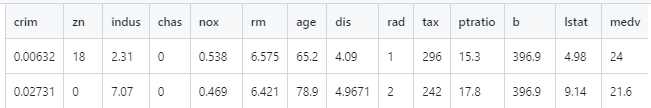

### Pandas 라이브러리로 보스턴 집값 데이터셋 살펴보기

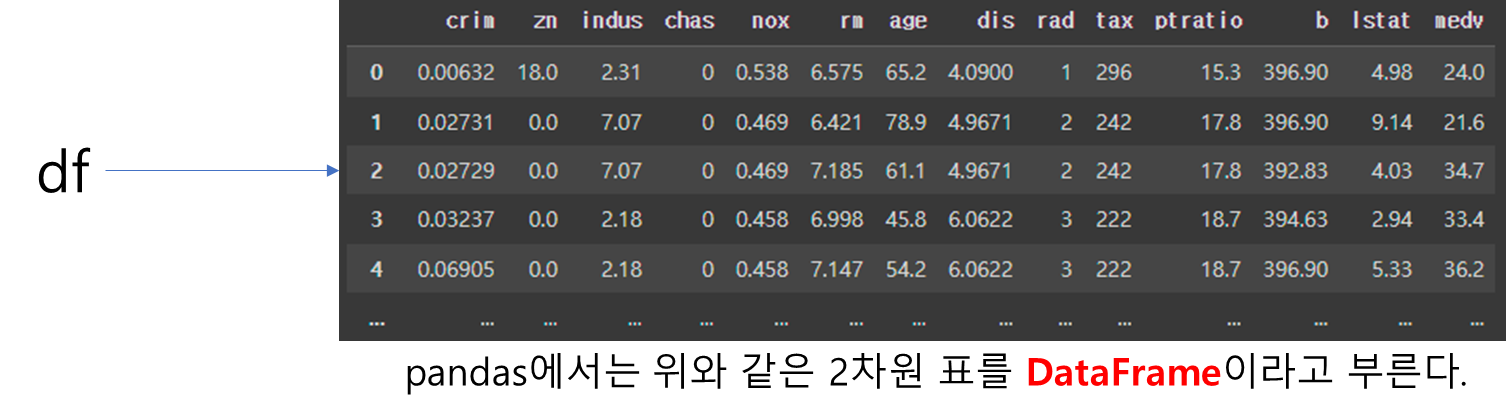

In [ ]:
# pandas 모듈 불러오기
import pandas as pd

In [ ]:
# 아래 URL의 CSV 데이터 파일 판다스로 불러오기(읽어오기)
# https://raw.githubusercontent.com/ygcho-git/basic_AI/main/dataset/boston.csv
df = pd.read_csv( )

In [ ]:
# df 데이터 프레임 보기

print()

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [ ]:
# 문제 : df 데이터 프레임 첫 5개만 보기



,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# 문제 : df 데이터 프레임 마지막 5개만 보기



,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [ ]:
# 문제 : df 데이터 프레임의 행의 갯수와 열의 개수 보기



(506, 14)

In [ ]:
# 문제 : df 데이터 프레임의 컬럼명, 컬럼별 데이터 수, 데이터 타입을 확인



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
# 문제 : df 데이터 프레임의 컬럼명, 컬럼별 데이터 수, 데이터 타입을 확인



,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# 문제 : crim(범죄율) 컬럼만 자르기

df[]

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: crim, Length: 506, dtype: float64

In [ ]:
# 문제 : age(1940년 이전에 건축된 소유 주택의 비율), rm(방개수) 컬럼만 자르기

df[???]

## 위 데이터 셋으로 집값을 예측하는 모델을 개발할 때,

독립변수 ?
종속변수 ?

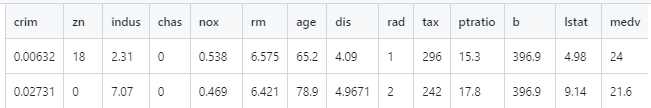

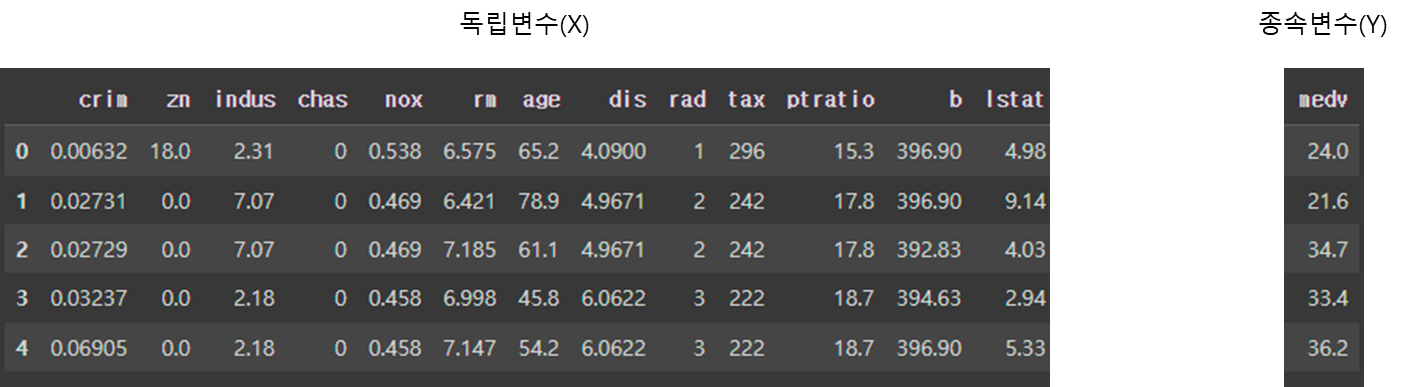

In [ ]:
# 독립변수 컬럼 데이터만 X에
X = df[????]

# 종속변수 컬럼 데이터만 Y에
Y = df[???]

In [ ]:
# 문제 : 독립변수 데이터 셋만 보기



In [ ]:
# 문제 : 종속변수 데이터 셋만 보기



## 모델 개발 총정리

In [ ]:
# 0. 필요한 모듈을 import한다.
import numpy as np
import pandas as pd
import keras

# 1. 데이터를 준비한다.


# 2. 모델의 구조를 설계한다.


# 3. 모델의 학습을 설정한다.


# 4. 모델을 학습시킨다.



## 종합

In [ ]:
# 0. 필요한 모듈을 import한다.
import numpy as np
import pandas as pd
import keras

# 1. 데이터를 준비한다.
df = pd.read_csv("https://raw.githubusercontent.com/ygcho-git/basic_AI/main/dataset/boston.csv")

X = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']]
Y = df['medv']


# 2. 모델의 구조를 설계한다.
model = keras.Sequential()
model.add(keras.layers.Input(shape=(13, )))
model.add(keras.layers.Dense(1))


# 3. 모델의 학습을 설정한다.
my_opt = keras.optimizers.SGD(learning_rate=0.000001)
model.compile(loss='mse', optimizer=my_opt)


# 4. 모델을 학습시킨다.
model.fit(X, Y, epochs=1000)

## 파이썬 함수의 Default Parameter

In [ ]:
# 일반적인 매개변수
def func1(name, age, school) :
    print(name, age, school)

func1("홍길동", 17, "충남과학고")
#func1("홍길동", 17) # 오류

In [ ]:
# 디폴트 매개변수 사용
def func2(name, age, school="충남과학고") :
    print(name, age, school)

func2("홍길동", 17, "충남과학고")
func2("홍길동", 17) # 오류 아님